#Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
data=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Selection-techniques/master/train.csv')
X=data.iloc[:,0:20]
y=data.iloc[:,-1]

In [8]:
#apply SelectKBest class to extract top 10 best features
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(X,y)


In [9]:
dfscore=pd.DataFrame(fit.scores_)
dfcolumn=pd.DataFrame(X.columns)

In [11]:
feature_score=pd.concat([dfcolumn,dfscore],axis=1)
feature_score.columns=['Specs','Score']

In [12]:
feature_score

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [13]:
print(feature_score.nlargest(10,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878



#Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [15]:
print(model.feature_importances_)

[0.06138561 0.01915246 0.03411618 0.01983029 0.03198455 0.01726828
 0.03613773 0.03392846 0.03600204 0.03433441 0.03411818 0.04554836
 0.04830338 0.39436199 0.03344304 0.03382414 0.03445035 0.01316235
 0.01786423 0.02078396]


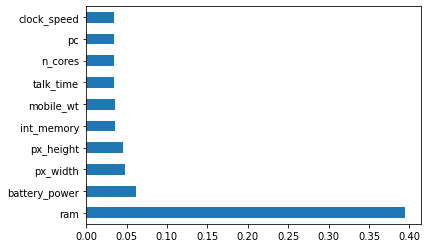

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()